> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: TMDb movie data
> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>  
> - Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
> 
> - There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
> 
> - The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> **Proposed Question:**
> 
> Q1: Which genres are most popular?
> 
> Q2: Is there progress in no of movies produced from year to year?
> 
> Q3: Does the rating has a relation with the revenue?
> 
> Q4: Does the movie with high budget generate higher revenue?
> 
> Q5: What are the top directors whose movies has the highest & lowest revenue?
> 
> Q6: What are the top cast whose movies has the highest?
> 
> Q7: What are the top production companies whose movies has the highest & lowest revenue?
> 
> Q8: What are the top directors whose movies has the highest & lowest rating?
> 
> Q9: What are the top cast whose movies has the highest rating?
> 
> Q10: What are the top movies whose movies has the highest & lowest rating?
> 
> Q11: What are the top companies with the highest no of produced movies?
> 
> Q12: Which year has the highest no of movies?
> 
> Q13: Which year has the highest budget & highest revenue?
> 
> Q14: Is there a relation between popularity, revenue?
> 
> Q15: Is there any relation between runtime & revenue?**


In [1]:
# import the pndas, numpy & matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

# Assessing
Use the space below to explore `tmdb-movies.csv` to answer the quiz questions below.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Let us make some investigation on the data set

In [3]:
# check the no of rows & columns for the dataset
df.shape

(10866, 21)

### Now, we know that we have **10,866** rows & **21** columns

In [4]:
# Chek the data info including the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# check the no of cells in each column which has missing value
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### There are some colmn has missing values, we need to work on that later

In [6]:
# identify the unique data in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Exploring the data set, we see some cells for revenue & budget has a **zero** value, this is not logic. We need to exclude them

In [7]:
missing_revenue =df.query('revenue_adj == 0').count()
missing_budget = df.query('budget_adj == 0').count()
missing_revenue.revenue_adj, missing_budget.budget_adj 

(6016, 5696)

## Here, check for duplicated rows

In [8]:
# check the duplication in the dataset
df.duplicated().sum()

1

### There are one duplicated rows, need to be dropped.

> **Observations**: 

From the above data asessing, the following observation are taken :

1. There are unnedded column which can be removed such as :id ,imdb_id,budget, revenue, homepage, tagline & overview.
2. There are missing values in many column, like: cast,director & production_companies.
3. Ther are one duplicated row.
4. There are many cells for budget & revenue has zero value, which is not logic. 
5. Certain columns, like ‘cast’and ‘genres’, contain multiplevalues separated by pipe (|)characters.

### Data Cleaning
1. Remove the non-needed columns such as : id ,imdb_id,budget, revenue, homepage, tagline & overview, keyword
2. Remove the rows that contain missing value  
3. Remove the duplicated row.
4. Filter the budget & rows whos vlaue is not equal to zero 
5. Create columns with the name of actors/actress after removing the (|) characters.

### There are some columns which are not used in our analysis, we can drop them

In [9]:
# drop the non-needed columns from the data frame
obs_col= ['imdb_id','budget', 'revenue', 'homepage', 'tagline', 'overview','keywords']
df.drop(obs_col,axis=1, inplace=True )
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
# check the no of rows & columns for the new dataset
df.shape

(10866, 14)

### After removing the some columns, the set has **10866** rows & **14** columns

In [11]:
# Check for the missing value in the new dataframe
df.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Drop the missing value

In [12]:
# drop rows with any null values in the datasets
df.dropna(inplace=True)

In [13]:
# checks if any of columns in the dataframe have null values - should print False
df.isnull().sum().any()

False

### Drop the duplicated rows

In [14]:
# remove the duplicated row
df.drop_duplicates(inplace=True)

In [15]:
# Check the no of columns & rows after duplicate & missing value removal
df.shape

(9772, 14)

### Filter the data without zero budget & revenue

In [16]:
df = df.query('budget_adj != 0 and revenue_adj != 0')
df

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,0.670274,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,Chenault Productions,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08
10828,5780,0.402730,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,Mystery|Thriller,Universal Pictures,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07
10829,6644,0.395668,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07
10835,5923,0.299911,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08


In [17]:
# check if there is revenue or budget has a zero value
missing_revenue =df.query('revenue_adj == 0').count()
missing_budget = df.query('budget_adj == 0').count()
missing_revenue.revenue_adj, missing_budget.budget_adj 

(0, 0)

In [18]:
# check the no of row & columns
df.shape

(3805, 14)

### Our data contains ** 3805** rows & **14** columns

> Tip: We need to set a new datafram withe seperated columns for the values contain `character |`. This dataframe can be used later in dataanalysis.

In [19]:
# list of columns names to needed to be split for cast, 
cast = {0:'cast1',1:'cast2',2:'cast3',3:'cast4',4:'cast5'}
production_companies= {0:'production_companies1',1:'production_companies2',2:'production_companies3',3:'production_companies4',4:'production_companies5'}
genres= {0:'genres1',1:'genres2',2:'genres3',3:'genres4',4:'genres5'}

In [20]:
# split each on of the above columns to have only one value in each column
df1= df['cast'].str.split('|', expand=True, )
df2 = df['production_companies'].str.split('|', expand=True, )
df3 = df['genres'].str.split('|', expand=True, )
df1.rename(columns=cast, inplace=True)
df2.rename(columns=production_companies, inplace=True)
df3.rename(columns=genres, inplace=True)

In [21]:
# df.drop(columns= ['cast', 'production_companies', 'genres'])
combined = [df,df1,df2,df3]
df_combined = df.join([df1,df2,df3])
df_combined.drop(columns= ['cast','genres','production_companies'],inplace=True)


### save the new dataframe to csv file

In [22]:
df_combined.to_csv('combined_dataset.csv', index=False)

In [23]:
df_combined.shape

(3805, 26)

<a id='eda'></a>
## Exploratory Data Analysis

### Here, we are going to set a function for count the no of movies for certain column. This function will be applied to columns contains values seperated by `character |`, such as : production companies, genres ...etc.

In [24]:
## set a function which can be used for determination & plotting graph for column contain many value such as :genres
def sep_column(column,size=10):
    data = df[column].str.cat(sep='|')
    # save the data in new sereis
    data = pd.Series(data.split('|'))
    count = data.value_counts()
    # use only the top values according to the required size
    count_size = count.head(size)
    y_axis = column.capitalize()
    fig = plt.figure(figsize=(12, 6))
    # plot horizontal bar plot
    count_size.plot.barh()
    # plot labels & titles    
    plt.xlabel('Movies Count',fontsize = 20)
    plt.ylabel(y_axis,fontsize = 14)
    plt.title('The Top ' + str(size) + ' '+ y_axis, fontsize = 22)
     

### The below cell is similair to above one, excpet it is applied to the column contain items without `character |`. It also used to count no of movies for each parameter

In [25]:
## set a function which can be used for determination & plotting graph for column contain one value such as :genres
def count(column,size=10):
    data = df[column]
    # save the data in new sereis
    data = pd.Series(data)
    count = data.value_counts()
    # use only the top values according to the required size
    count_size = count.head(size)
    y_axis = column.capitalize()
    fig = plt.figure(figsize=(12, 6))
    # plot bar plot
    count_size.plot.bar()
    # plot labels & titles    
    plt.xlabel('Movies Count',fontsize = 20)
    plt.ylabel(y_axis,fontsize = 14)
    plt.title('The Top ' + str(size) + ' '+ y_axis, fontsize = 22)

### Again, we are going to set a function for sum of required parameters for certain column. This function will be applied to columns contains values seperated by `character |`, such as : cast ...etc. In this function, we can use the previously set up dataframe `df_combined`

In [26]:
# set a function for sum of required parameters for certain column using 'df_combined'
def sep_max(column,column2,size=10):
    # using groupby method to find the sum of parameter & order the values from high to low 
    max_group=df_combined.groupby(column)[column2].sum().nlargest(size).sort_values(ascending=True)
    # use only the top values according to the required size
    rating_max= max_group.head(size)
    # plot horizontal bar plot
    rating_max.plot.barh() 
    # plot labels & titles 
    plt.xlabel(column2.capitalize(),fontsize = 20)
    plt.ylabel(column.capitalize(),fontsize = 14)
    plt.title('The Top ' + str(size) + ' '+ ' cast' + ' in terms of ' +column2.capitalize() , fontsize = 15)
    plt.show

### Define a function to use it for plot the mean maximum & minimum parameter associated with other value

In [27]:
# define function to use it for plot the max parameter associated with other value
def df_max(column,column2,size=10):
    # using groupby method to find the mean of parameter & order the values from high to low
    max_group=df.groupby(column)[column2].mean().nlargest(size).sort_values(ascending=True)
    # use only the top values according to the required size
    rating_max= max_group.head(size)
    # plot horizontal bar plot
    rating_max.plot.barh()
    # plot labels & titles 
    plt.xlabel(column2.capitalize(),fontsize = 20)
    plt.ylabel(column.capitalize(),fontsize = 14)
    plt.title('The Top ' + str(size) + ' '+ column.capitalize() + ' in terms of ' +column2.capitalize() , fontsize = 15)
    plt.show

In [28]:
# define function to use it for plot the min parameter associated with other value
def df_min(column,column2,size=10):
    # using groupby method to find the mean of parameter & order the values from low to high
    min_group=df.groupby(column)[column2].mean().nsmallest(size).sort_values(ascending=True)
    rating_min= min_group.head(size)
    # plot horizontal bar plot
    rating_min.plot.barh()
    # plot labels & titles
    plt.xlabel(column2,fontsize = 20)
    plt.ylabel(column.capitalize(),fontsize = 18)
    plt.title('The Lowest  ' + str(size) + ' '+ column.capitalize() + ' in terms of '+ column2.capitalize(), fontsize = 15)
    plt.show

### Define a function for the sum of certain parameter vs column. This can be used to determine the cast whose achieve the highest revenue, or the highest production companies whose spent the max sum of budget in the movies.  

In [29]:
def df_summx(column,column2,size=10):
    # using groupby method to find the mean of parameter & order the values from high to low
    max_group=df.groupby(column)[column2].sum().nlargest(size).sort_values(ascending=True)
    rating_max= max_group.head(size)
    # plot horizontal bar plot
    rating_max.plot.bar()
    # plot labels & titles
    plt.xlabel(column.capitalize(),fontsize = 20)
    plt.ylabel(column2.capitalize(),fontsize = 14)
    plt.title('The Top ' + str(size) + ' '+ column.capitalize() + ' in terms of ' +column2.capitalize() , fontsize = 15)
    plt.show

In [52]:
def df_summin(column,column2,size=10):
    # using groupby method to find the mean of parameter & order the values from high to low
    max_group=df.groupby(column)[column2].sum().nsmallest(size).sort_values(ascending=True)
    rating_min= max_group.head(size)
    # plot horizontal bar plot
    rating_min.plot.bar()
    # plot labels & titles
    plt.xlabel(column.capitalize(),fontsize = 20)
    plt.ylabel(column2.capitalize(),fontsize = 14)
    plt.title('The Lowest ' + str(size) + ' '+ column.capitalize() + ' in terms of ' +column2.capitalize() , fontsize = 15)
    plt.show

### Use the below function te explore any correrlation between two parameters. 

In [31]:
def df_corr(column,column2):
    # plot a scatter plot to show a releation between two parameters
    df.plot(x=column, y= column2,kind="scatter",figsize=(10,10));
    # plot labels & titles
    plt.xlabel(column.capitalize(),fontsize = 20)
    plt.ylabel(column2.capitalize(),fontsize = 14)
    plt.title('The relation between ' +  ' '+ column.capitalize() + ' & ' +column2.capitalize() , fontsize = 15)
    plt.show

## Q1: Which genres are most popular ?

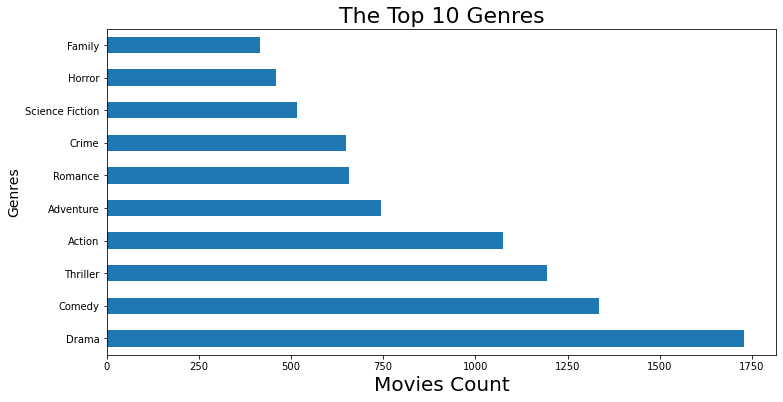

In [32]:
sep_column('genres')

## Q2: Is there progress in no of movies produced from year to year?

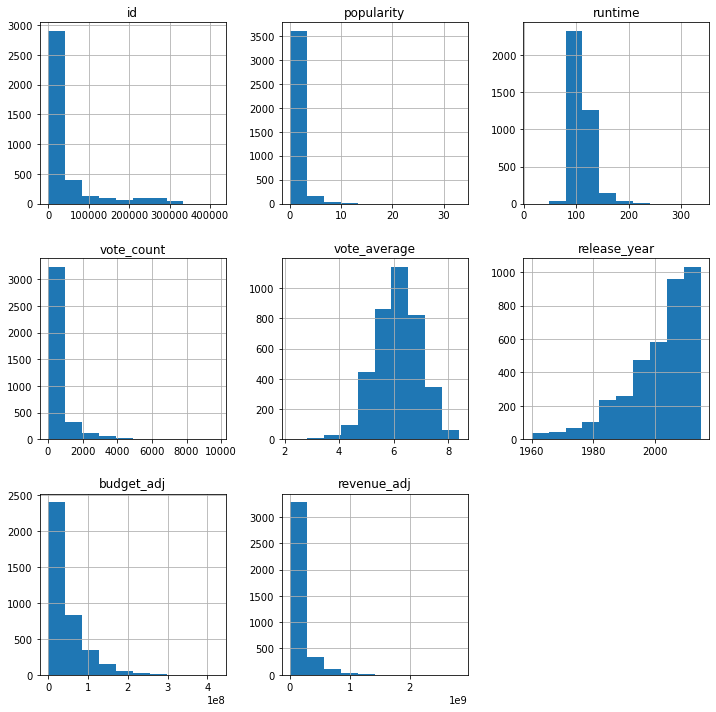

In [33]:
df.hist(figsize=(12,12));

## Q3: Does the rating has a relation with the revenue?

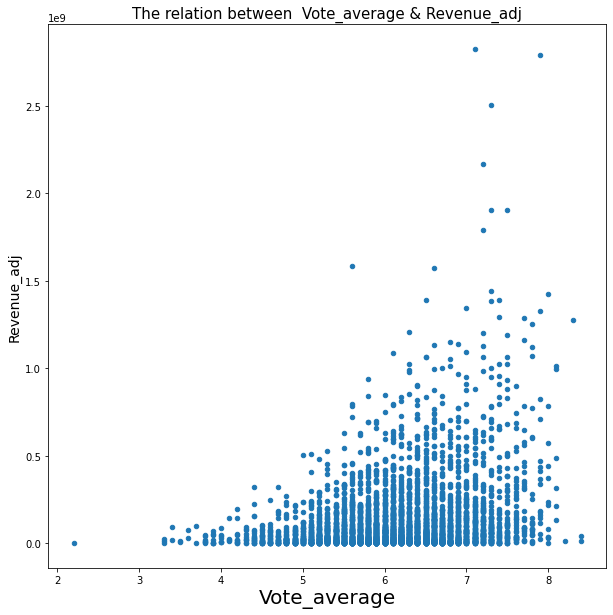

In [34]:
df_corr('vote_average', 'revenue_adj')

## Q4: Does the movie with high budget generate higher revenue?

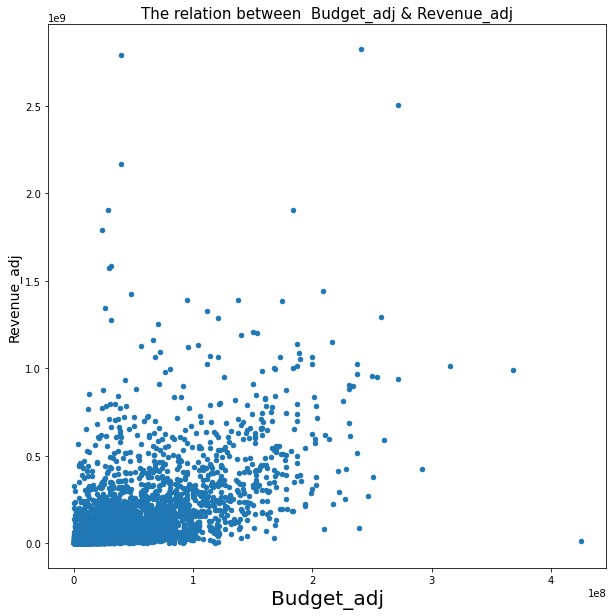

In [35]:
df_corr('budget_adj', 'revenue_adj')

## Q5: What are the top directors whose movies has the highest & lowest revenue?

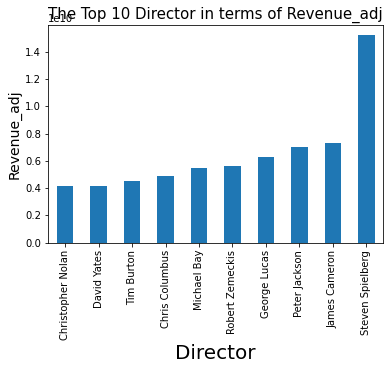

In [36]:
df_summx('director','revenue_adj')

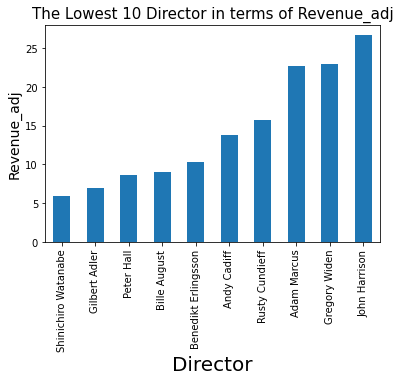

In [53]:
df_summin('director','revenue_adj')

## Q6: What are the top cast whose movies has the highest revenue?

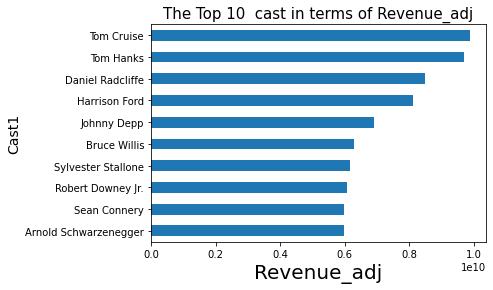

In [38]:
sep_max('cast1','revenue_adj')

## Q7: What are the top production companies whose movies has the highest & lowest revenue?

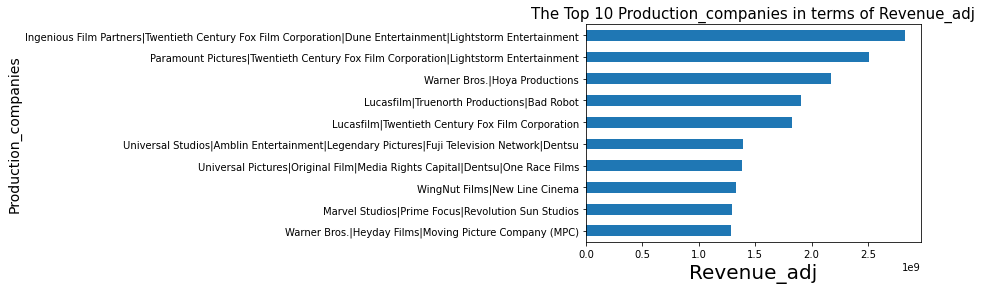

In [39]:
df_max('production_companies', 'revenue_adj')

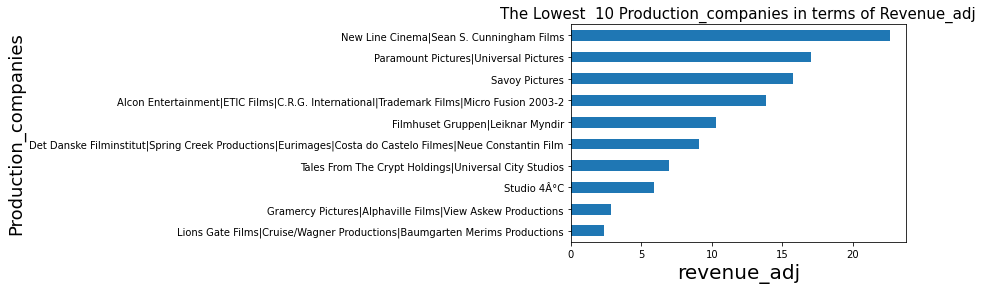

In [40]:
df_min('production_companies', 'revenue_adj')

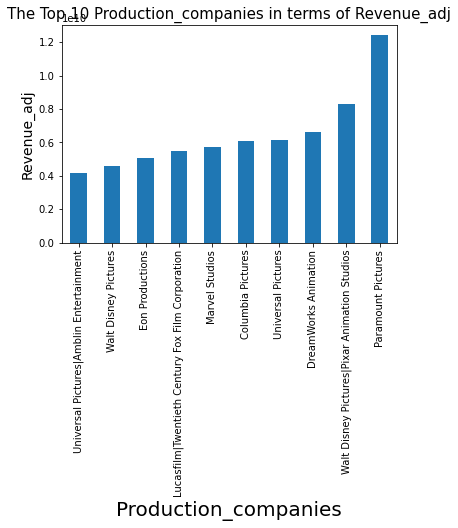

In [58]:
df_summx('production_companies', 'revenue_adj')

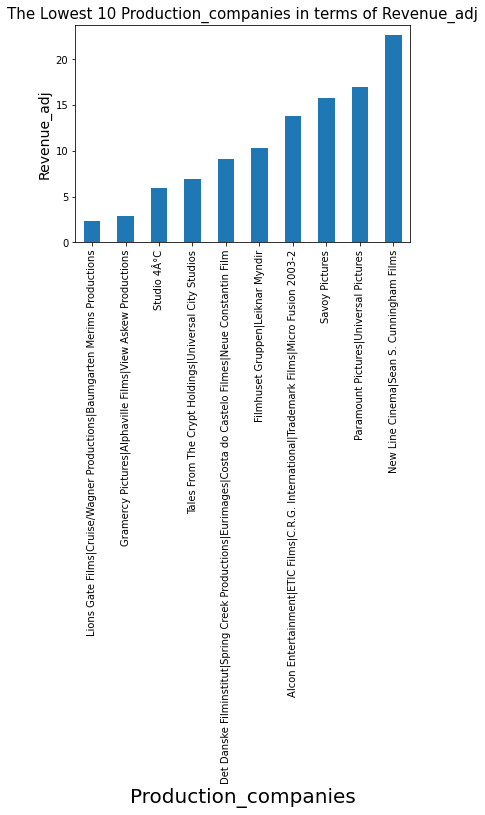

In [59]:
df_summin('production_companies', 'revenue_adj')

## Q8: What are the top directors whose movies has the highest & lowest rating?

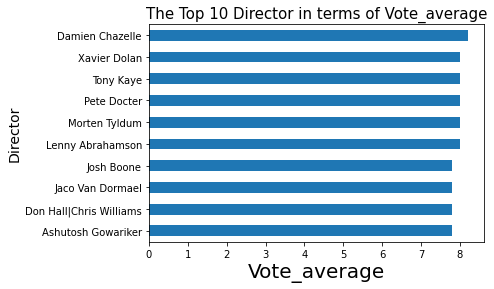

In [55]:
df_max('director','vote_average')

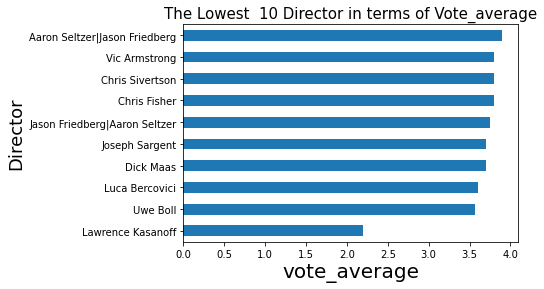

In [42]:
df_min('director','vote_average')

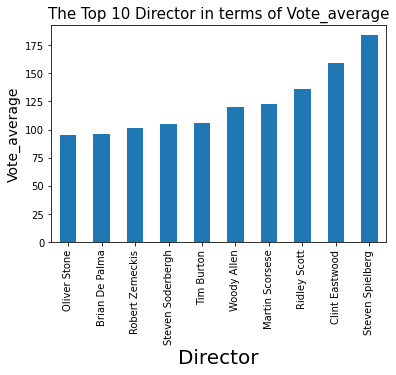

In [56]:
df_summx('director','vote_average')

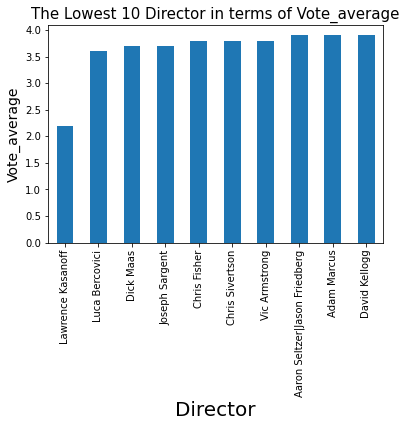

In [57]:
df_summin('director','vote_average')

## Q9: What are the top cast whose movies has the highest rating?

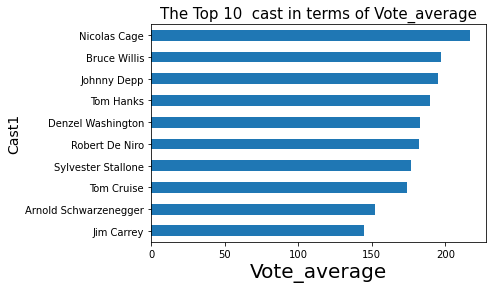

In [43]:
sep_max('cast1','vote_average')

## Q10: What are the top movies whose movies has the highest & lowest revenue /rating?

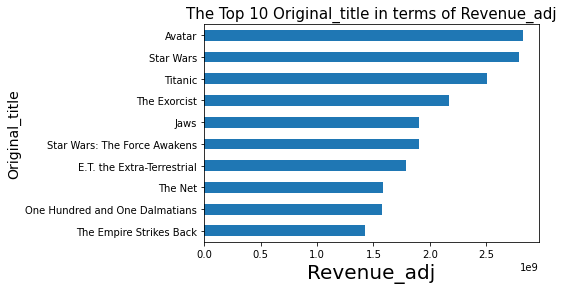

In [61]:
df_max('original_title','revenue_adj')

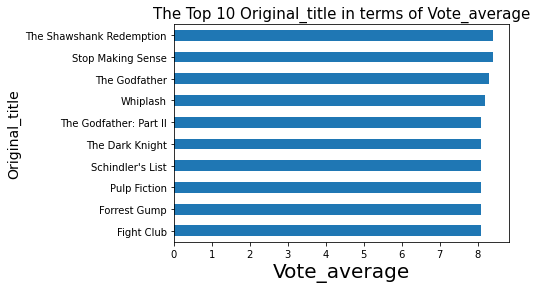

In [60]:
df_max('original_title','vote_average')

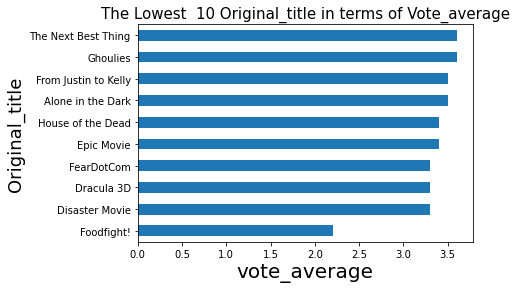

In [62]:
df_min('original_title','vote_average')

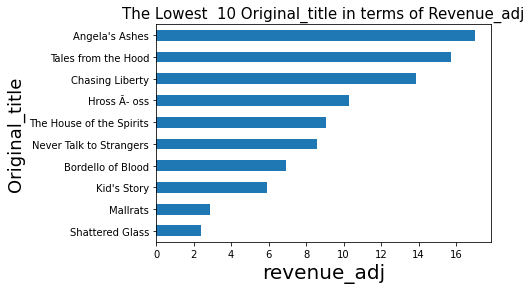

In [45]:
df_min('original_title','revenue_adj')

## Q11: What are the top companies with the highest no of produced movies?

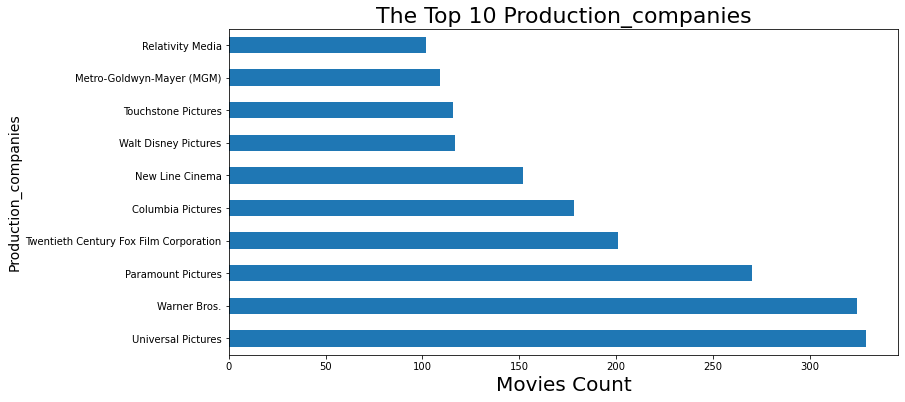

In [46]:
sep_column("production_companies")

## Q12: Which year has the highest no of movies?

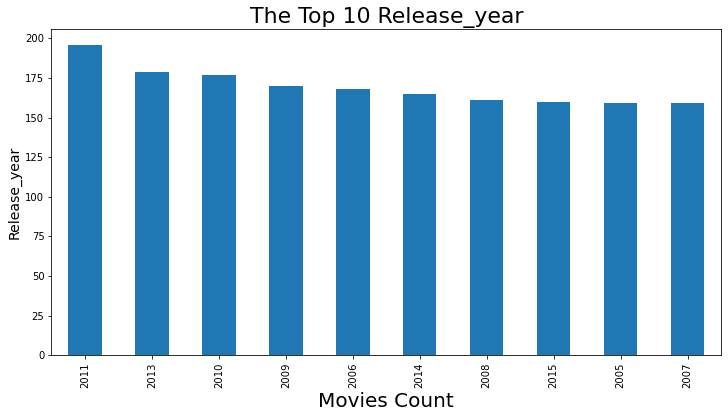

In [47]:
count('release_year')

## Q13: Which year has the highest budget & highest revenue?

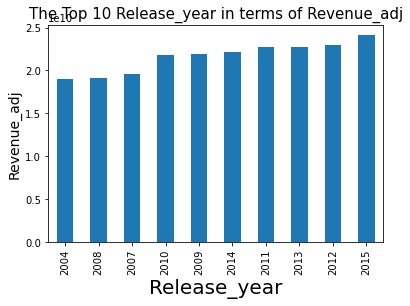

In [48]:
df_summx('release_year', 'revenue_adj')

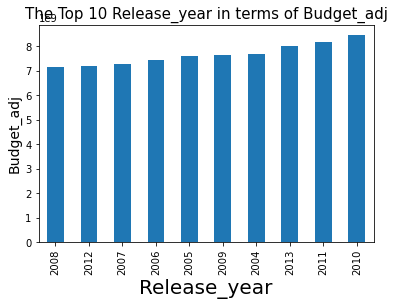

In [49]:
df_summx('release_year', 'budget_adj')

## Q14: Is there a relation between popularity, revenue?

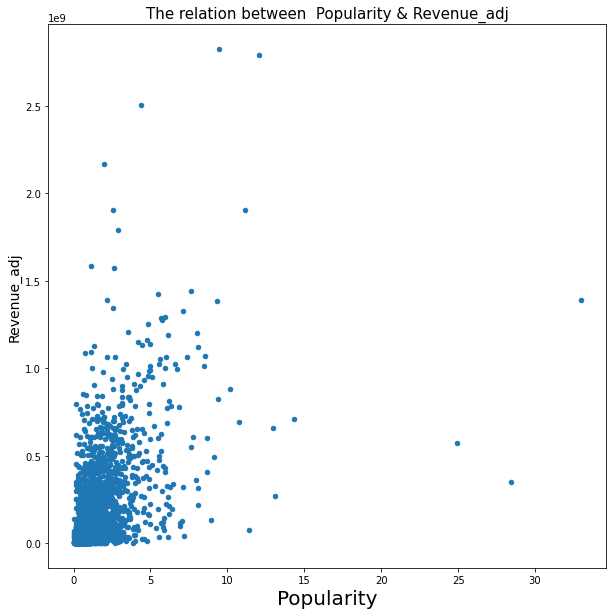

In [50]:
df_corr('popularity', 'revenue_adj')

## Q15: Is there any relation between runtime & revenue?

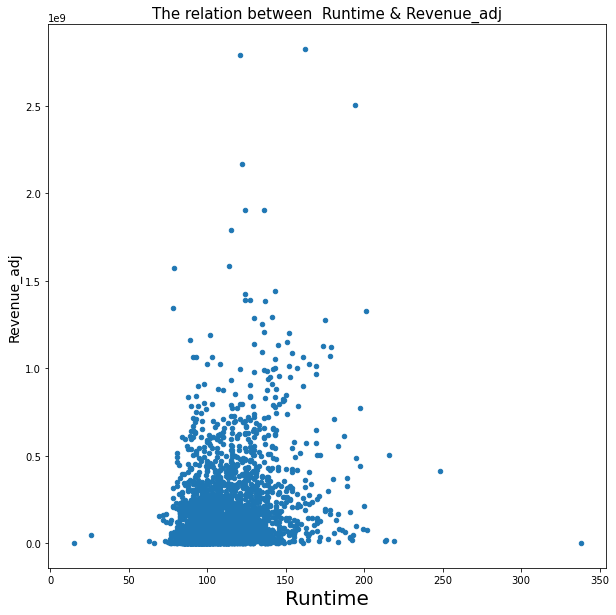

In [51]:
df_corr('runtime', 'revenue_adj')

<a id='conclusions'></a>
## Conclusions

**Limitations:**

-	Dataset contains some missing values & also zero value in revenue & budget columns. All of these values need to be removed before conducting the required analysis. 
-	Also, the dataset contains one duplicated rows which is also removed to make the dataset cleaner.
-	Also, some columns in the dataset are not required in the analysis like:” id”, so the list of these columns has been dropped.
-	In this analysis, revenue_adj & budget_adj, is used instead of absolute revenue & budget. From my point of view, this gives better way for comparison of revenues & budgets through different years with the same base. This also is useful in avoiding the inflation & currency depreciation effect.
-	Also, some columns (like: cast, genres) have the values separated with character “|”. This make the analysis more difficult, since you can’t deal with one value without separate the values in a single value.



**Findings:**
-	The most produced movies are under the **`Drama`** then **`Comedy`** section.  
-	The most of movies runtime is between (90 – 140) minutes.
-	There is obvious increase in the no. of movies through the years. The histogram is highly left-skewed which reflects this fact.
-	The year (2011) has the highest no of produced movies.
-	We can see the relation between average rating & revenue. This is reflecting the facts that as the audience like the movie as the revenue increase.
-	There is weak relation between budget & revenue. It is not always to have high revenue as the budget increases.
-	**`Stephen Spielberg`** is the director who achieve the highest sum of revenue through his movies.
-	“Tom Cruise” is the actor whose movies achieve the highest revenue, while “Nicolas Cage” is the actor who achieve the highest average rating for his movies. 
-	The most revenue movie is **`Avatar`**, then **`Star Wars`**, while **`Titanic`** comes in the third place.
-	Also, the most company produces movies are **`Universal Pictures`**, then **`Warner Bros`**.
